# 4. 3월 31일이후의 누적 확진자수 그래프
# 4~6월 지역별 누적 확진자 수 시각화
# 대한민국 내 지역별, 월별 확진자의 증가 추세 확인 가능

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint as pp
from inspect import signature

## TimeProvince.csv 파일 불러오기

In [8]:
df_timeProvince= pd.read_csv("./DataScienceforCOVID19/TimeProvince.csv")
df_timeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


In [9]:
df_timeProvince_fin= {"date": df_timeProvince.date, "province": df_timeProvince.province, "confirmed": df_timeProvince.confirmed}
df_timeProvince_fin= pd.DataFrame(df_timeProvince_fin)
df_timeProvince_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2771 non-null   object
 1   province   2771 non-null   object
 2   confirmed  2771 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.1+ KB


## date컬럼 datetime으로 형변환 및 컬럼 추가

In [10]:
df_timeProvince_fin["date_ct"]= pd.to_datetime(df_timeProvince_fin.date)

## 2020.03.30기준으로 데이터 분리

In [11]:
df_timeProvince_after= df_timeProvince_fin[df_timeProvince_fin.date_ct> "2020-03-31"]

## 그래프 그리기

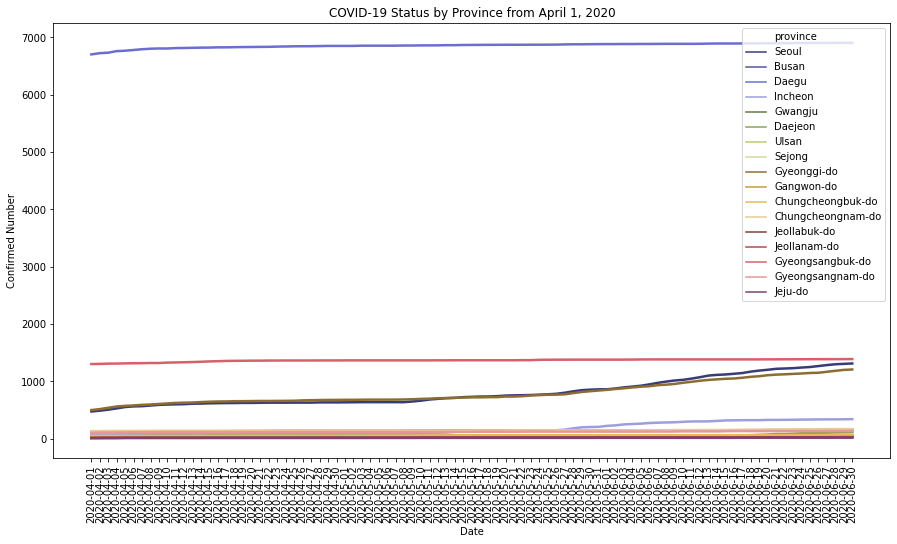

In [12]:
frame= plt.figure(figsize= (15, 8))
frame= plt.xticks(rotation= 90)

grid = sns.lineplot(
    x= "date",
    y= "confirmed",
    hue= "province",
    data= df_timeProvince_after,
    palette= "tab20b",
    linewidth= 2.5
);

grid.set_title("COVID-19 Status by Province from April 1, 2020")
grid.set_xlabel("Date")
grid.set_ylabel("Confirmed Number")

plt.show()